In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import transforms, datasets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import os
from PIL import Image
import torchvision.transforms as transforms


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
class CustomDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        label_path = os.path.join(self.labels_dir, self.image_files[idx].replace('.jpg', '.txt'))
        
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        
        with open(label_path, 'r') as f:
            label = int(f.readline().split()[0])  # Leer la primera línea y obtener la clase
        
        return image, label

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40, expand=True),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = CustomDataset(images_dir='train/images', labels_dir='train/labels', transform=transform)
valid_dataset = CustomDataset(images_dir='valid/images', labels_dir='valid/labels', transform=transform)
test_dataset = CustomDataset(images_dir='test/images', labels_dir='test/labels', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
from sklearn.model_selection import KFold
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
import numpy as np

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)  # Aumentar la tasa de abandono

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Cargar las clases desde el archivo classes.txt
with open('classes.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

num_classes = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Fold 1/3
Epoch [1/30], Train Loss: 2.5529
Epoch [1/30], Validation Loss: 2.4331
Precision: 0.0498, Recall: 0.2009, F1 Score: 0.0795, Accuracy: 0.2009


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/30], Train Loss: 2.2618
Epoch [2/30], Validation Loss: 2.1890
Precision: 0.1778, Recall: 0.2991, F1 Score: 0.1933, Accuracy: 0.2991


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/30], Train Loss: 2.1547
Epoch [3/30], Validation Loss: 2.2070
Precision: 0.1779, Recall: 0.2692, F1 Score: 0.1690, Accuracy: 0.2692


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [4/30], Train Loss: 2.0378
Epoch [4/30], Validation Loss: 2.0207
Precision: 0.2346, Recall: 0.3376, F1 Score: 0.2520, Accuracy: 0.3376


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [5/30], Train Loss: 1.9221
Epoch [5/30], Validation Loss: 1.9252
Precision: 0.3232, Recall: 0.3675, F1 Score: 0.2984, Accuracy: 0.3675


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([3, 3, 0, 5], device='cuda:0')
GroundTruth: tensor([ 3, 11,  0,  6], device='cuda:0')
None


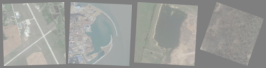

Epoch [6/30], Train Loss: 1.9072
Epoch [6/30], Validation Loss: 1.8427
Precision: 0.2606, Recall: 0.3675, F1 Score: 0.2752, Accuracy: 0.3675


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [7/30], Train Loss: 1.8418
Epoch [7/30], Validation Loss: 1.8993
Precision: 0.2353, Recall: 0.3419, F1 Score: 0.2653, Accuracy: 0.3419


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [8/30], Train Loss: 1.8467
Epoch [8/30], Validation Loss: 1.8706
Precision: 0.2594, Recall: 0.3419, F1 Score: 0.2711, Accuracy: 0.3419


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [9/30], Train Loss: 1.7577
Epoch [9/30], Validation Loss: 1.8042
Precision: 0.2143, Recall: 0.3504, F1 Score: 0.2499, Accuracy: 0.3504


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [10/30], Train Loss: 1.7451
Epoch [10/30], Validation Loss: 1.7706
Precision: 0.3021, Recall: 0.3761, F1 Score: 0.3218, Accuracy: 0.3761


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([5, 5, 1, 3], device='cuda:0')
GroundTruth: tensor([5, 5, 7, 3], device='cuda:0')
None


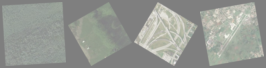

Epoch [11/30], Train Loss: 1.7012
Epoch [11/30], Validation Loss: 1.6987
Precision: 0.3473, Recall: 0.4103, F1 Score: 0.3441, Accuracy: 0.4103


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [12/30], Train Loss: 1.6197
Epoch [12/30], Validation Loss: 1.6723
Precision: 0.3410, Recall: 0.4017, F1 Score: 0.3394, Accuracy: 0.4017


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [13/30], Train Loss: 1.5965
Epoch [13/30], Validation Loss: 1.7057
Precision: 0.3698, Recall: 0.4145, F1 Score: 0.3562, Accuracy: 0.4145


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [14/30], Train Loss: 1.5068
Epoch [14/30], Validation Loss: 1.7276
Precision: 0.3387, Recall: 0.4231, F1 Score: 0.3410, Accuracy: 0.4231


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [15/30], Train Loss: 1.5729
Epoch [15/30], Validation Loss: 1.6484
Precision: 0.4447, Recall: 0.4359, F1 Score: 0.3932, Accuracy: 0.4359


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([3, 5, 2, 5], device='cuda:0')
GroundTruth: tensor([7, 5, 2, 9], device='cuda:0')
None


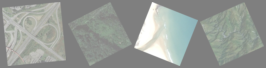

Epoch [16/30], Train Loss: 1.4571
Epoch [16/30], Validation Loss: 1.6223
Precision: 0.4266, Recall: 0.4829, F1 Score: 0.4323, Accuracy: 0.4829


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [17/30], Train Loss: 1.4183
Epoch [17/30], Validation Loss: 1.6977
Precision: 0.3540, Recall: 0.4231, F1 Score: 0.3642, Accuracy: 0.4231


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [18/30], Train Loss: 1.4178
Epoch [18/30], Validation Loss: 1.6415
Precision: 0.3607, Recall: 0.4444, F1 Score: 0.3815, Accuracy: 0.4444


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [19/30], Train Loss: 1.4142
Epoch [19/30], Validation Loss: 1.6000
Precision: 0.4150, Recall: 0.3974, F1 Score: 0.3760, Accuracy: 0.3974


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [20/30], Train Loss: 1.3228
Epoch [20/30], Validation Loss: 1.5752
Precision: 0.4261, Recall: 0.4530, F1 Score: 0.4124, Accuracy: 0.4530


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([ 5, 10, 11,  3], device='cuda:0')
GroundTruth: tensor([13, 10, 11,  3], device='cuda:0')
None


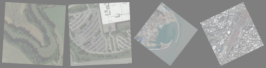

Epoch [21/30], Train Loss: 1.2940
Epoch [21/30], Validation Loss: 1.5927
Precision: 0.4389, Recall: 0.4530, F1 Score: 0.4040, Accuracy: 0.4530


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [22/30], Train Loss: 1.3499
Epoch [22/30], Validation Loss: 1.6667
Precision: 0.4314, Recall: 0.4487, F1 Score: 0.4069, Accuracy: 0.4487


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [23/30], Train Loss: 1.2099
Epoch [23/30], Validation Loss: 1.6821
Precision: 0.4542, Recall: 0.4744, F1 Score: 0.4193, Accuracy: 0.4744


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [24/30], Train Loss: 1.1911
Epoch [24/30], Validation Loss: 1.6316
Precision: 0.4465, Recall: 0.4573, F1 Score: 0.4238, Accuracy: 0.4573


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [25/30], Train Loss: 1.1514
Epoch [25/30], Validation Loss: 1.5824
Precision: 0.4386, Recall: 0.4701, F1 Score: 0.4313, Accuracy: 0.4701
Early stopping!
Fold 2/3


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/30], Train Loss: 2.5249
Epoch [1/30], Validation Loss: 2.5187
Precision: 0.0415, Recall: 0.1373, F1 Score: 0.0387, Accuracy: 0.1373


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/30], Train Loss: 2.2915
Epoch [2/30], Validation Loss: 2.4194
Precision: 0.1552, Recall: 0.2189, F1 Score: 0.1278, Accuracy: 0.2189


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/30], Train Loss: 2.1408
Epoch [3/30], Validation Loss: 2.1754
Precision: 0.1988, Recall: 0.3090, F1 Score: 0.2029, Accuracy: 0.3090


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [4/30], Train Loss: 2.0096
Epoch [4/30], Validation Loss: 2.1280
Precision: 0.1697, Recall: 0.2918, F1 Score: 0.1831, Accuracy: 0.2918


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [5/30], Train Loss: 1.9928
Epoch [5/30], Validation Loss: 2.2475
Precision: 0.3548, Recall: 0.3133, F1 Score: 0.2449, Accuracy: 0.3133


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([ 3,  2, 11,  5], device='cuda:0')
GroundTruth: tensor([ 1,  1, 11,  8], device='cuda:0')
None


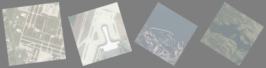

Epoch [6/30], Train Loss: 1.9235
Epoch [6/30], Validation Loss: 2.0505
Precision: 0.2197, Recall: 0.3476, F1 Score: 0.2412, Accuracy: 0.3476


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [7/30], Train Loss: 1.8474
Epoch [7/30], Validation Loss: 2.0353
Precision: 0.3194, Recall: 0.3863, F1 Score: 0.3308, Accuracy: 0.3863


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [8/30], Train Loss: 1.7369
Epoch [8/30], Validation Loss: 2.0556
Precision: 0.3232, Recall: 0.3391, F1 Score: 0.2767, Accuracy: 0.3391


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [9/30], Train Loss: 1.7527
Epoch [9/30], Validation Loss: 1.9913
Precision: 0.3135, Recall: 0.3691, F1 Score: 0.3050, Accuracy: 0.3691


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [10/30], Train Loss: 1.7593
Epoch [10/30], Validation Loss: 2.0197
Precision: 0.3092, Recall: 0.3519, F1 Score: 0.3016, Accuracy: 0.3519


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([3, 6, 6, 6], device='cuda:0')
GroundTruth: tensor([3, 6, 6, 8], device='cuda:0')
None


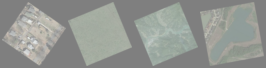

Epoch [11/30], Train Loss: 1.7218
Epoch [11/30], Validation Loss: 1.8799
Precision: 0.3252, Recall: 0.4120, F1 Score: 0.3403, Accuracy: 0.4120


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [12/30], Train Loss: 1.6222
Epoch [12/30], Validation Loss: 1.8958
Precision: 0.4113, Recall: 0.4163, F1 Score: 0.3682, Accuracy: 0.4163


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [13/30], Train Loss: 1.6569
Epoch [13/30], Validation Loss: 1.8425
Precision: 0.3457, Recall: 0.4464, F1 Score: 0.3768, Accuracy: 0.4464


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [14/30], Train Loss: 1.5967
Epoch [14/30], Validation Loss: 1.7786
Precision: 0.3585, Recall: 0.4335, F1 Score: 0.3752, Accuracy: 0.4335


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [15/30], Train Loss: 1.5379
Epoch [15/30], Validation Loss: 1.8267
Precision: 0.4422, Recall: 0.4335, F1 Score: 0.3849, Accuracy: 0.4335


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([ 1,  3,  9, 11], device='cuda:0')
GroundTruth: tensor([ 4,  3,  8, 11], device='cuda:0')
None


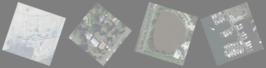

Epoch [16/30], Train Loss: 1.5187
Epoch [16/30], Validation Loss: 1.8621
Precision: 0.4742, Recall: 0.4592, F1 Score: 0.4078, Accuracy: 0.4592


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [17/30], Train Loss: 1.5509
Epoch [17/30], Validation Loss: 1.8250
Precision: 0.4083, Recall: 0.4292, F1 Score: 0.3819, Accuracy: 0.4292


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [18/30], Train Loss: 1.4959
Epoch [18/30], Validation Loss: 1.9151
Precision: 0.4188, Recall: 0.4163, F1 Score: 0.3702, Accuracy: 0.4163


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [19/30], Train Loss: 1.4113
Epoch [19/30], Validation Loss: 1.7341
Precision: 0.3911, Recall: 0.4721, F1 Score: 0.4060, Accuracy: 0.4721


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [20/30], Train Loss: 1.3359
Epoch [20/30], Validation Loss: 1.8836
Precision: 0.3947, Recall: 0.4249, F1 Score: 0.3771, Accuracy: 0.4249


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([ 6,  4,  5, 11], device='cuda:0')
GroundTruth: tensor([6, 4, 9, 3], device='cuda:0')
None


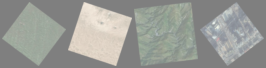

Epoch [21/30], Train Loss: 1.3684
Epoch [21/30], Validation Loss: 1.7672
Precision: 0.4267, Recall: 0.4764, F1 Score: 0.4221, Accuracy: 0.4764


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [22/30], Train Loss: 1.3287
Epoch [22/30], Validation Loss: 1.8409
Precision: 0.3806, Recall: 0.4163, F1 Score: 0.3650, Accuracy: 0.4163


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [23/30], Train Loss: 1.3584
Epoch [23/30], Validation Loss: 1.7395
Precision: 0.4238, Recall: 0.4721, F1 Score: 0.4291, Accuracy: 0.4721


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [24/30], Train Loss: 1.3212
Epoch [24/30], Validation Loss: 1.7231
Precision: 0.4141, Recall: 0.4764, F1 Score: 0.4220, Accuracy: 0.4764


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [25/30], Train Loss: 1.2703
Epoch [25/30], Validation Loss: 1.7279
Precision: 0.3815, Recall: 0.4678, F1 Score: 0.4065, Accuracy: 0.4678


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([3, 2, 3, 1], device='cuda:0')
GroundTruth: tensor([5, 2, 7, 1], device='cuda:0')
None


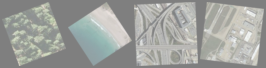

Epoch [26/30], Train Loss: 1.2626
Epoch [26/30], Validation Loss: 1.7170
Precision: 0.4819, Recall: 0.5021, F1 Score: 0.4651, Accuracy: 0.5021


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [27/30], Train Loss: 1.2284
Epoch [27/30], Validation Loss: 1.7407
Precision: 0.4936, Recall: 0.4893, F1 Score: 0.4413, Accuracy: 0.4893


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [28/30], Train Loss: 1.2292
Epoch [28/30], Validation Loss: 1.7539
Precision: 0.4284, Recall: 0.4764, F1 Score: 0.4252, Accuracy: 0.4764


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [29/30], Train Loss: 1.2268
Epoch [29/30], Validation Loss: 1.7657
Precision: 0.4447, Recall: 0.4807, F1 Score: 0.4489, Accuracy: 0.4807


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [30/30], Train Loss: 1.1979
Epoch [30/30], Validation Loss: 1.7408
Precision: 0.4239, Recall: 0.4936, F1 Score: 0.4375, Accuracy: 0.4936


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([ 3, 11,  5,  8], device='cuda:0')
GroundTruth: tensor([6, 9, 1, 8], device='cuda:0')
None


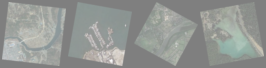

Fold 3/3
Epoch [1/30], Train Loss: 2.6247
Epoch [1/30], Validation Loss: 2.4486
Precision: 0.0910, Recall: 0.2489, F1 Score: 0.1326, Accuracy: 0.2489


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/30], Train Loss: 2.4055
Epoch [2/30], Validation Loss: 2.2286
Precision: 0.1940, Recall: 0.3305, F1 Score: 0.1936, Accuracy: 0.3305


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/30], Train Loss: 2.2225
Epoch [3/30], Validation Loss: 2.2302
Precision: 0.1331, Recall: 0.3090, F1 Score: 0.1857, Accuracy: 0.3090


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [4/30], Train Loss: 2.1644
Epoch [4/30], Validation Loss: 2.0456
Precision: 0.2074, Recall: 0.3305, F1 Score: 0.1985, Accuracy: 0.3305


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [5/30], Train Loss: 2.0834
Epoch [5/30], Validation Loss: 1.9893
Precision: 0.2337, Recall: 0.3863, F1 Score: 0.2756, Accuracy: 0.3863


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([3, 1, 4, 3], device='cuda:0')
GroundTruth: tensor([3, 6, 4, 3], device='cuda:0')
None


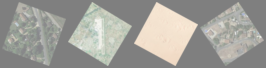

Epoch [6/30], Train Loss: 2.0448
Epoch [6/30], Validation Loss: 1.9849
Precision: 0.3024, Recall: 0.3648, F1 Score: 0.2616, Accuracy: 0.3648


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [7/30], Train Loss: 1.9861
Epoch [7/30], Validation Loss: 2.0360
Precision: 0.2195, Recall: 0.3691, F1 Score: 0.2685, Accuracy: 0.3691


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [8/30], Train Loss: 1.9112
Epoch [8/30], Validation Loss: 1.8845
Precision: 0.3124, Recall: 0.3948, F1 Score: 0.3313, Accuracy: 0.3948


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [9/30], Train Loss: 1.8388
Epoch [9/30], Validation Loss: 1.8685
Precision: 0.3565, Recall: 0.4206, F1 Score: 0.3657, Accuracy: 0.4206


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [10/30], Train Loss: 1.8479
Epoch [10/30], Validation Loss: 1.8365
Precision: 0.3712, Recall: 0.4249, F1 Score: 0.3267, Accuracy: 0.4249


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([3, 4, 1, 3], device='cuda:0')
GroundTruth: tensor([7, 2, 4, 3], device='cuda:0')
None


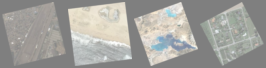

Epoch [11/30], Train Loss: 1.7672
Epoch [11/30], Validation Loss: 1.8067
Precision: 0.4036, Recall: 0.4249, F1 Score: 0.3736, Accuracy: 0.4249


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [12/30], Train Loss: 1.7091
Epoch [12/30], Validation Loss: 1.8438
Precision: 0.2809, Recall: 0.4206, F1 Score: 0.3213, Accuracy: 0.4206


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [13/30], Train Loss: 1.7012
Epoch [13/30], Validation Loss: 1.7496
Precision: 0.4221, Recall: 0.4378, F1 Score: 0.3970, Accuracy: 0.4378


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [14/30], Train Loss: 1.6855
Epoch [14/30], Validation Loss: 1.7572
Precision: 0.3862, Recall: 0.4335, F1 Score: 0.3703, Accuracy: 0.4335


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [15/30], Train Loss: 1.6705
Epoch [15/30], Validation Loss: 1.7147
Precision: 0.4132, Recall: 0.4764, F1 Score: 0.4181, Accuracy: 0.4764


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([3, 0, 6, 1], device='cuda:0')
GroundTruth: tensor([11,  0,  5,  1], device='cuda:0')
None


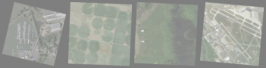

Epoch [16/30], Train Loss: 1.6606
Epoch [16/30], Validation Loss: 1.8221
Precision: 0.4403, Recall: 0.4464, F1 Score: 0.3996, Accuracy: 0.4464


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [17/30], Train Loss: 1.6399
Epoch [17/30], Validation Loss: 1.7057
Precision: 0.3946, Recall: 0.4464, F1 Score: 0.3715, Accuracy: 0.4464


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [18/30], Train Loss: 1.5311
Epoch [18/30], Validation Loss: 1.6932
Precision: 0.4856, Recall: 0.4721, F1 Score: 0.4336, Accuracy: 0.4721


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [19/30], Train Loss: 1.6151
Epoch [19/30], Validation Loss: 1.6879
Precision: 0.4752, Recall: 0.4464, F1 Score: 0.4013, Accuracy: 0.4464


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [20/30], Train Loss: 1.6062
Epoch [20/30], Validation Loss: 1.6687
Precision: 0.4540, Recall: 0.4678, F1 Score: 0.4206, Accuracy: 0.4678


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([ 3,  6, 13,  4], device='cuda:0')
GroundTruth: tensor([12,  6,  0,  4], device='cuda:0')
None


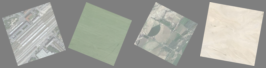

Epoch [21/30], Train Loss: 1.5698
Epoch [21/30], Validation Loss: 1.7034
Precision: 0.4358, Recall: 0.4936, F1 Score: 0.4490, Accuracy: 0.4936


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [22/30], Train Loss: 1.6054
Epoch [22/30], Validation Loss: 1.6401
Precision: 0.4757, Recall: 0.4979, F1 Score: 0.4566, Accuracy: 0.4979


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [23/30], Train Loss: 1.4870
Epoch [23/30], Validation Loss: 1.6065
Precision: 0.4862, Recall: 0.4850, F1 Score: 0.4547, Accuracy: 0.4850


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [24/30], Train Loss: 1.4826
Epoch [24/30], Validation Loss: 1.6401
Precision: 0.5010, Recall: 0.4936, F1 Score: 0.4704, Accuracy: 0.4936


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [25/30], Train Loss: 1.4949
Epoch [25/30], Validation Loss: 1.6626
Precision: 0.4782, Recall: 0.5150, F1 Score: 0.4777, Accuracy: 0.5150


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([11,  3,  5,  0], device='cuda:0')
GroundTruth: tensor([11, 12,  8,  2], device='cuda:0')
None


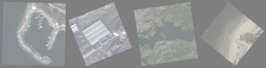

Epoch [26/30], Train Loss: 1.3884
Epoch [26/30], Validation Loss: 1.6366
Precision: 0.4889, Recall: 0.4678, F1 Score: 0.4481, Accuracy: 0.4678


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [27/30], Train Loss: 1.4412
Epoch [27/30], Validation Loss: 1.8347
Precision: 0.4626, Recall: 0.4549, F1 Score: 0.4365, Accuracy: 0.4549


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [28/30], Train Loss: 1.4478
Epoch [28/30], Validation Loss: 1.5939
Precision: 0.4596, Recall: 0.5150, F1 Score: 0.4693, Accuracy: 0.5150


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [29/30], Train Loss: 1.2950
Epoch [29/30], Validation Loss: 1.5392
Precision: 0.4901, Recall: 0.5279, F1 Score: 0.4866, Accuracy: 0.5279


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [30/30], Train Loss: 1.3009
Epoch [30/30], Validation Loss: 1.6110
Precision: 0.5076, Recall: 0.5107, F1 Score: 0.4940, Accuracy: 0.5107


/home/silva/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted: tensor([3, 9, 5, 3], device='cuda:0')
GroundTruth: tensor([10,  1,  5,  3], device='cuda:0')
None


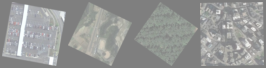

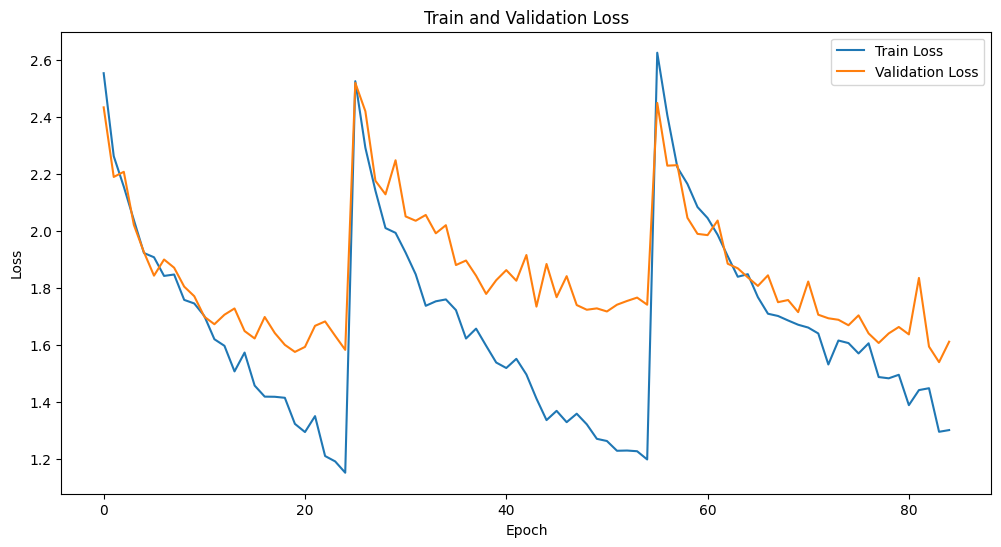

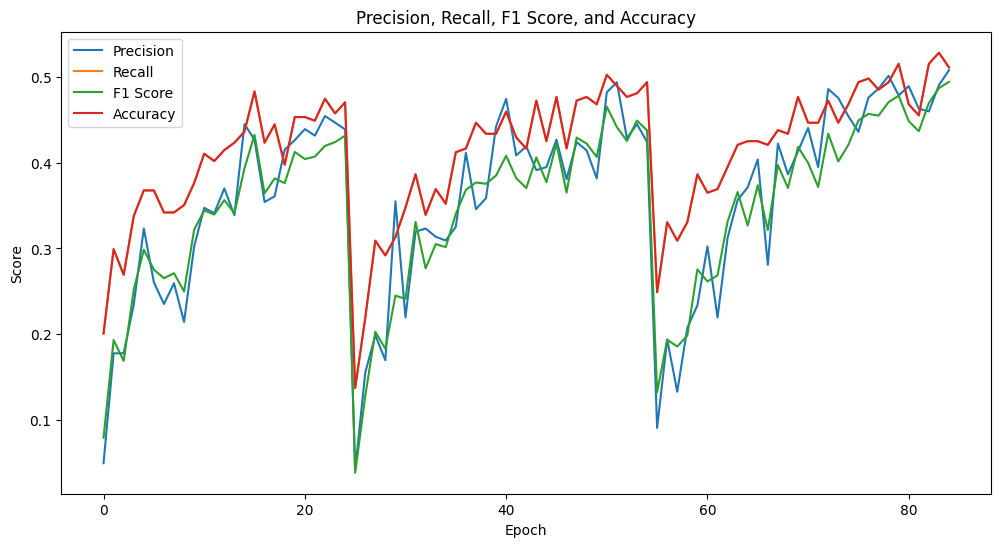

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Crear el dataset
dataset = CustomDataset(images_dir='train/images', labels_dir='train/labels', transform=transform)

# Configurar K-Fold Cross-Validation
k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True)

# Variables para almacenar las pérdidas y métricas
train_losses = []
valid_losses = []
all_precisions = []
all_recalls = []
all_f1s = []
all_accuracies = []

def imshow(img_tensor, title=None):
    img = img_tensor / 2 + 0.5  # Desnormalizar si es necesario
    npimg = img.numpy()
    img = np.transpose(npimg, (1, 2, 0))
    img = (img * 255).astype(np.uint8)  # Convertir a uint8
    img = Image.fromarray(img)
    print(title)
    img.show(title=title)

# K-Fold Cross-Validation
for fold, (train_ids, valid_ids) in enumerate(kfold.split(dataset)):
    print(f'Fold {fold+1}/{k_folds}')
    
    # Crear los dataloaders para el fold actual
    train_subsampler = Subset(dataset, train_ids)
    valid_subsampler = Subset(dataset, valid_ids)
    
    train_loader = DataLoader(train_subsampler, batch_size=32, shuffle=True)
    valid_loader = DataLoader(valid_subsampler, batch_size=32, shuffle=False)
    
    # Inicializar el modelo, criterio, optimizador y scheduler
    model = CNNModel(num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
    
    num_epochs = 30
    best_valid_loss = float('inf')
    patience = 5
    trigger_times = 0
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')
        
        # Calcular la pérdida de validación
        model.eval()
        valid_loss = 0
        all_labels = []
        all_preds = []
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())
        valid_loss /= len(valid_loader)
        valid_losses.append(valid_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {valid_loss:.4f}')
        
        # Calcular métricas
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')
        accuracy = accuracy_score(all_labels, all_preds)
        
        all_precisions.append(precision)
        all_recalls.append(recall)
        all_f1s.append(f1)
        all_accuracies.append(accuracy)
        
        print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}')
        
        # Ajustar la tasa de aprendizaje
        scheduler.step(valid_loss)
        
        # Early Stopping
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            trigger_times = 0
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print('Early stopping!')
                break
        
        # Visualizar las imágenes y predicciones cada 5 épocas
        if (epoch + 1) % 5 == 0:
            with torch.no_grad():
                inputs, labels = next(iter(train_loader))
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                print(f'Predicted: {predicted[:4]}')
                print(f'GroundTruth: {labels[:4]}')
                imshow(torchvision.utils.make_grid(inputs.cpu()[:4]))

# Graficar las pérdidas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

# Graficar las métricas
plt.figure(figsize=(12, 6))
plt.plot(all_precisions, label='Precision')
plt.plot(all_recalls, label='Recall')
plt.plot(all_f1s, label='F1 Score')
plt.plot(all_accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Precision, Recall, F1 Score, and Accuracy')
plt.show()

In [6]:
model.eval()
valid_loss = 0
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Mover los datos a CUDA
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        valid_loss += loss.item()
valid_loss /= len(valid_loader)
print(f'Validation Loss: {valid_loss:.4f}')

Validation Loss: 1.6527


Real: Airport, Predicted: Airport


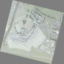

Real: Highway, Predicted: Parking


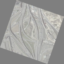

Real: Airport, Predicted: Airport


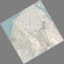

Real: Mountain, Predicted: Forest


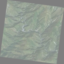

Real: Grassland, Predicted: Grassland


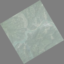

Real: Grassland, Predicted: Grassland


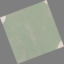

Real: Beach, Predicted: Airport


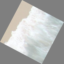

Real: City, Predicted: City


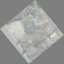

Real: Desert, Predicted: Mountain


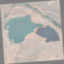

Real: Highway, Predicted: City


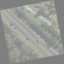

Real: Desert, Predicted: Desert


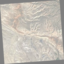

Real: Airport, Predicted: Airport


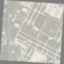

Real: Desert, Predicted: Desert


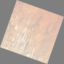

Real: Agriculture, Predicted: Agriculture


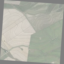

Real: Agriculture, Predicted: Forest


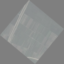

Real: Desert, Predicted: Desert


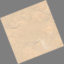

Real: City, Predicted: City


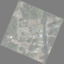

Real: Agriculture, Predicted: Airport


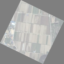

Real: Grassland, Predicted: City


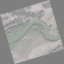

Real: Desert, Predicted: Desert


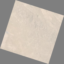

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(img_tensor, title=None):
    
    img = img_tensor / 2 + 0.5  # Desnormalizar si es necesario
    npimg = img.numpy()
    img = np.transpose(npimg, (1, 2, 0))
    img = (img * 255).astype(np.uint8)  # Convertir a uint8
    img = Image.fromarray(img)
    print(title)
    img.show(title=title)

# Seleccionar 10 imágenes aleatorias del conjunto de validación
model.eval()
images, labels = next(iter(valid_loader))
images, labels = images.to(device), labels.to(device)

# Seleccionar 10 índices aleatorios
indices = np.random.choice(len(images), 20, replace=False)
selected_images = images[indices]
selected_labels = labels[indices]

# Obtener las predicciones del modelo
with torch.no_grad():
    outputs = model(selected_images)
    _, predicted = torch.max(outputs, 1)

# Mostrar las imágenes junto con las etiquetas reales y predichas
# Mostrar las imágenes junto con las etiquetas reales y predichas
for i in range(20):
    show_image(selected_images[i].cpu(), f'Real: {classes[selected_labels[i]]}, Predicted: {classes[predicted[i]]}')